<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/multilayer_perceptron/02_neural_network_cancer_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

import tensorflow
import keras

from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics

# **Descripcion**
---



Utilizando el conjunto de datos de supervivencia de cancer se plicara cross validation

# **Objetivo**
---
Predecir pacientes con más posibilidades de morir.


# **Dicionario de datos**
---
Conjunto de datos de supervivencia de Haberman

- `Age`: Edad del paciente en el momento de la operación 
- `Year`: Año de operación del paciente 
- `Nodes`: Número de ganglios axilares positivos detectados
- `status`: Estado de supervivencia
-- 1  paciente sobrevivió 5 años o más
-- 2  paciente murió dentro de los 5 años


# **Data**
---



In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv', header=None, names=['age', 'year', 'node', 'status'])
data.head(5)

,age,year,node,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   node    306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


- Todas las variables son de tipo numerico
- No hay valores nulos

In [4]:
data['status'].replace({1:0}, inplace=True)
data['status'].replace({2:1}, inplace=True)

# **Split**
---

In [5]:
data_values = data.values
X = data_values[:, :3]
y = data_values[:,3]

In [6]:
def plot_bars(data: np.ndarray, title: str= 'feature', x_size:int=6, y_size:int=4, font_size:int=15, x_label:str='churm',y_label:str='count', c_n_churm = '0', c_churm = '1')->None:
  fig, ax = plt.subplots(figsize = (x_size, y_size))
  fig.suptitle(f'Count plot {title}', fontsize = font_size)
  sns.countplot(x = data, ax = ax)
  _, data_target = np.unique(data, return_counts=True)
  len_data = data.shape[0]
  pe = '{0:.2f}'.format(data_target[1]/len_data)
  ps = '{0:.2f}'.format(data_target[0]/len_data)
  ax.set_xticklabels([f'{c_n_churm} \n {ps}', f'{c_churm} \n{pe}'])
  ax.set(xlabel=x_label, ylabel=y_label)
  fig.show()

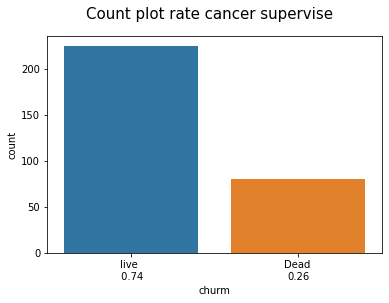

In [7]:
plot_bars(y, title = 'rate cancer supervise', c_churm='Dead', c_n_churm='live')

Hay un serio desbalance en el conjunto de datos del 74% registros son para los pacientes que vivieron y 26% son los pacientes que murireron.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=300, shuffle=True, stratify=y)

- Como las categorías se encuentran desbalanceadas, se procede a realizar una partición estratificada.

# **Model**
---

## **Model Base**
---

In [9]:
def model_base():
  model = Sequential()
  model.add(Dense(10, input_dim = 3, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [10]:
model = model_base()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size=16, verbose = 0)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


# **Curvas de aprendizaje de optimización model base**
---

In [12]:
def optimization_learning_curves(history: keras.callbacks.History, metrica, title: str= '', x_size:int=8, y_size:int=4, font_size:int=15, x_label:str='Epoch',y_label:str='Loss')->None:
  fig, ax = plt.subplots(figsize = (x_size, y_size))
  fig.suptitle(title, fontsize = font_size)
  ax.plot(history.history[metrica])
  ax.plot(history.history[f'val_{metrica}'])
  ax.set_xlabel(x_label, size = 12)
  ax.set_ylabel(y_label, size = 12)
  ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
  ax.tick_params(labelsize = 12)
  fig.show()

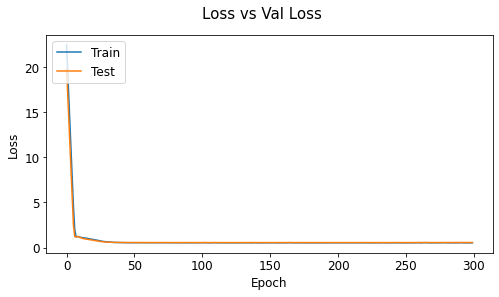

In [13]:
optimization_learning_curves(history, metrica='loss', title='Loss vs Val Loss')

La perdida de entrenamiento y validación disminuyen hasta el punto de estabilida durante 300 epocas, con una brecha de generailización casi inperceptible.

# **Predictions**
---

In [14]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = np.reshape(y_pred, y_pred.shape[0])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [15]:
def consufion_matrix(validation: np.ndarray, prediction:np.ndarray, churm:str='churm', no_churm:str='no_churm',  title: str= 'Matriz de confusion', x_size:int=6, y_size:int=5)->np.ndarray:
  matrix = metrics.confusion_matrix(validation, prediction)
  fig, ax = plt.subplots(nrows= 1, ncols=  1, figsize = (x_size,y_size))
  sns.heatmap(matrix, annot=True, ax = ax, cmap=plt.cm.Blues, fmt = 'g', annot_kws={'size': 13})
  ax.set_title(title, size = 13)
  ax.xaxis.set_ticklabels([no_churm, churm])
  ax.yaxis.set_ticklabels([no_churm, churm])
  ax.tick_params(labelsize = 13)
  fig.show()
  return matrix

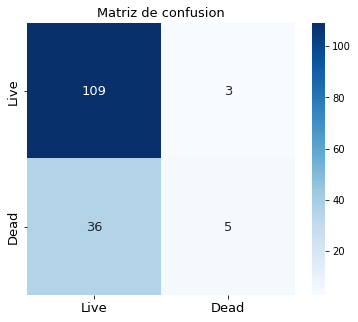

In [16]:
matrix = consufion_matrix(y_test, y_pred,'Dead', 'Live')

- A partir de la matriz, el modelo tiene problemas para  detectar pacientes con posibilidades de morir en 5 años, ya que hay pocos verdaderos positivos.

In [17]:
# Metricas
def metricas(validation: np.ndarray, prediction:np.ndarray, matrix:np.ndarray, label:list=[1], label_title:str='Target')->None:
  print(f'Accuracy  :   {metrics.accuracy_score(validation, prediction)}')
  print(f'Kappa     :   {metrics.cohen_kappa_score(validation, prediction)}')
  print(f'predicción {label_title}')
  print(f'Precision:   {metrics.precision_score(validation, prediction, labels=label, average="macro")}')
  print(f'Recall    :   {metrics.recall_score(validation, prediction, labels=label, average="macro")}')

  VN = matrix[0,0]
  FP = matrix[0,1]
  specificity = VN/(VN+FP)

  print(f'Specificity:   {specificity}')
  print(f'F1-score   :   {metrics.f1_score(validation, prediction, labels=label, average="macro")}' )

In [18]:
metricas(y_test, y_pred, matrix, label_title='probabilidad de morir en 5 años')

Accuracy  :   0.7450980392156863
Kappa     :   0.12775909954684994
predicción probabilidad de morir en 5 años
Precision:   0.625
Recall    :   0.12195121951219512
Specificity:   0.9732142857142857
F1-score   :   0.20408163265306123


- La sensibilidad es pesima, el conjunto de datos es muy pequeñ o el modelo no es el indicado, cabe resaltar que no se ha tratado la red, ya que la idea es experimentar con datos.

In [19]:
y_prob = model.predict(X_test)
pos_prob = np.reshape(y_prob, y_prob.shape[0])

In [20]:
def precision_recall(y:np.ndarray, prediction_prob:np.ndarray, validation:np.ndarray)->float:
  no_skill = len(y[y==1]) / len(y)
  plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
  precision, recall, _ = metrics.precision_recall_curve(validation, prediction_prob)
  plt.plot(recall, precision, marker='.', label='Multi Layer Perceptron')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()
  auc_score = metrics.auc(recall, precision)
  plt.show()
  return auc_score

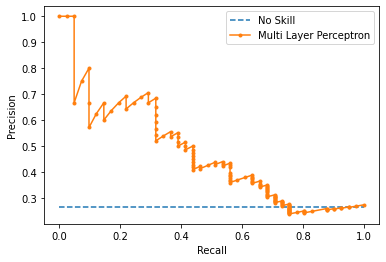

In [21]:
auc_score = precision_recall(y, pos_prob, y_test)

In [22]:
print('Multi Layer Perceptron PR AUC: %.3f' % auc_score)

Multi Layer Perceptron PR AUC: 0.473


- Acorde al area bajo la curva entre la precisión y la sensibilidad es pesimo no superando el modelo **sin habilidad**
- Es posible que con más datos y una estructura más amplia el modelo pueda mejorar su capacidad de predicción para detectar pacientes con diabetes.
- No se ha estandarizado los datos, puede que tambien influya .

# **Cross Validation**
---

In [23]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cv_score_loss_train = []
cv_score_loss_test = []
cv_score_accuracy_train = []
cv_score_accuracy_test = []

for train, test in kfold.split(X, y):
  model = model_base()
  history = model.fit(X[train], y[train], validation_data=(X[test], y[test]), batch_size=16, epochs=300, verbose = 0)
  loss_train, accuracy_train = model.evaluate(X[train], y[train], verbose=0)
  loss_test, accuracy_test = model.evaluate(X[test], y[test], verbose=0)
  cv_score_loss_train.append(loss_train)
  cv_score_loss_test.append(loss_test)
  cv_score_accuracy_train.append(accuracy_train)
  cv_score_accuracy_test.append(accuracy_test)
  print('======================================================================')
  print('loss: %.3f accuracy: %.3f val loss: %.3f val accuracy: %.3f' % (loss_train * 100, accuracy_train * 100, loss_test * 100, accuracy_test * 100))



loss: 53.950 accuracy: 74.182 val loss: 52.596 val accuracy: 74.194
loss: 52.280 accuracy: 77.091 val loss: 53.879 val accuracy: 70.968
loss: 53.566 accuracy: 73.818 val loss: 53.702 val accuracy: 77.419
loss: 51.003 accuracy: 77.091 val loss: 58.760 val accuracy: 70.968
loss: 53.494 accuracy: 73.818 val loss: 57.053 val accuracy: 77.419
loss: 52.399 accuracy: 77.091 val loss: 52.483 val accuracy: 74.194
loss: 53.591 accuracy: 75.362 val loss: 53.075 val accuracy: 76.667
loss: 50.678 accuracy: 76.449 val loss: 54.503 val accuracy: 73.333
loss: 50.823 accuracy: 77.899 val loss: 58.754 val accuracy: 70.000
loss: 54.465 accuracy: 74.275 val loss: 50.936 val accuracy: 73.333


- Los valores de pérdida de entrenamiento y validación tienden a converger, pese a que el valor no es baja.
- Pese a que la metrica de exactitud (accuracy) no es la más indicada se ve que los valores de entrenamiento y validación también tiende a converger
- El modelo generaliza bien



In [24]:
print('============================== 10 Pliegues ==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_score_loss_train)*100, np.std(cv_score_loss_train)*100))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_score_loss_test)*100, np.std(cv_score_loss_test)*100))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_score_accuracy_train), np.std(cv_score_accuracy_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_score_accuracy_test), np.std(cv_score_accuracy_test)))

============================== 10 Pliegues ==============================
52.62% (+/- 1.32%)
==============================Test Recall Total 10 pliegues==============================
54.57% (+/- 2.57%)
==============================Train Loss Total 10 pliegues==============================
0.76% (+/- 0.02%)
==============================Test Loss Total 10 pliegues==============================
0.74% (+/- 0.03%)


- La dispersión en la medida de la exactitud es muy bajo, por lo tanto, el modelo no está influenciado por el azar en la predicción de los pacientes que tiende a morir en 5 años.